In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('stats.txt', sep=',')
df.head()

,problem_name,planning_time,plan_length
0,problems/problem-experiment_5x5_6_150_1/proble...,0.647604,13
1,problems/problem-experiment_5x5_6_150_1/proble...,0.819740,30
2,problems/problem-experiment_5x5_6_150_1/proble...,0.737229,24
3,problems/problem-experiment_5x5_6_150_1/proble...,0.633495,16
4,problems/problem-experiment_5x5_6_150_1/proble...,0.642722,9


In [37]:
df['is_subproblem'] = df['problem_name'].str.split('/').str.len() > 2
df['problem'] = df['problem_name'].str.split('/').str[-1]
df['size'] = df['problem'].str.split('_').str[1].str.split('x').str[0].astype(int)
df['keys_count'] = df['problem'].str.split('_').str[2].astype(int)

In [69]:
df_subproblems = df[df['is_subproblem']].copy()

df_subproblems['subproblem_part'] = df_subproblems['problem'].str.split('-').str[-1]
df_subproblems['common_part'] = df_subproblems['problem'].str.split('-').str[:-1].str.join('-')

df_subproblems.groupby(by=['common_part', 'size', 'keys_count'])[['planning_time', 'plan_length']].sum().reset_index()

,common_part,size,keys_count,planning_time,plan_length
0,problem-experiment_5x5_6_150_1-subproblem,5,6,4.045366,96
1,problem-experiment_5x5_6_150_10-subproblem,5,6,4.656749,117
2,problem-experiment_5x5_6_150_2-subproblem,5,6,5.256875,103
3,problem-experiment_5x5_6_150_3-subproblem,5,6,5.090151,114
4,problem-experiment_5x5_6_150_4-subproblem,5,6,3.844271,50
...,...,...,...,...,...
65,problem-experiment_7x7_6_150_5-subproblem,7,6,31.141544,213
66,problem-experiment_7x7_6_150_6-subproblem,7,6,244.312817,404
67,problem-experiment_7x7_6_150_7-subproblem,7,6,64.536248,109
68,problem-experiment_7x7_6_150_8-subproblem,7,6,96.147081,284


In [51]:
df_grouped = df[df['plan_length'] != -1].groupby(by=['size', 'keys_count', 'is_subproblem'])['planning_time']

df_means = df_grouped.mean().reset_index()
df_std = df_grouped.std().reset_index()

In [52]:
df_means

,size,keys_count,is_subproblem,planning_time
0,5,6,False,3.264696
1,5,6,True,1.042885
2,6,5,False,64.903376
3,6,5,True,2.789653
4,6,6,False,54.648835
5,6,6,True,1.903426
6,6,7,False,78.253443
7,6,7,True,2.713581
8,6,8,False,18.831492
9,6,8,True,1.862358


In [38]:
df_full_problems = df[~df['is_subproblem']]
df_subproblems = df[df['is_subproblem']]

In [54]:
df_means_size6 = df_means[df_means['size'] == 6]
df_stds_size6 = df_std[df_std['size'] == 6]

df_means_size6_subproblems = df_means_size6[df_means_size6['is_subproblem']]
df_means_size6_full_problems = df_means_size6[~df_means_size6['is_subproblem']]

In [64]:
df_means_size6_full_problems['keys_count']

2     5
4     6
6     7
8     8
10    9
Name: keys_count, dtype: int64

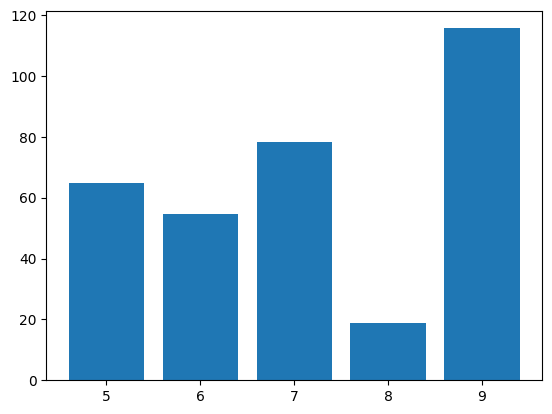

In [63]:
plt.bar(df_means_size6_full_problems['keys_count'], df_means_size6_full_problems['planning_time'])
plt.show()